# Data Exploration

In [678]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#for warnings
import warnings
warnings.filterwarnings('ignore')

In [679]:
#read the data
bike = pd.read_csv("D:\MY_ML\Linear Regression\Mulitpleregression\Assignment\day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [680]:
bike.shape

(730, 16)

In [681]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#From the above wwe see there are no NULL values. 

In [682]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# EDA Analysis.

#checking for null values.



In [683]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

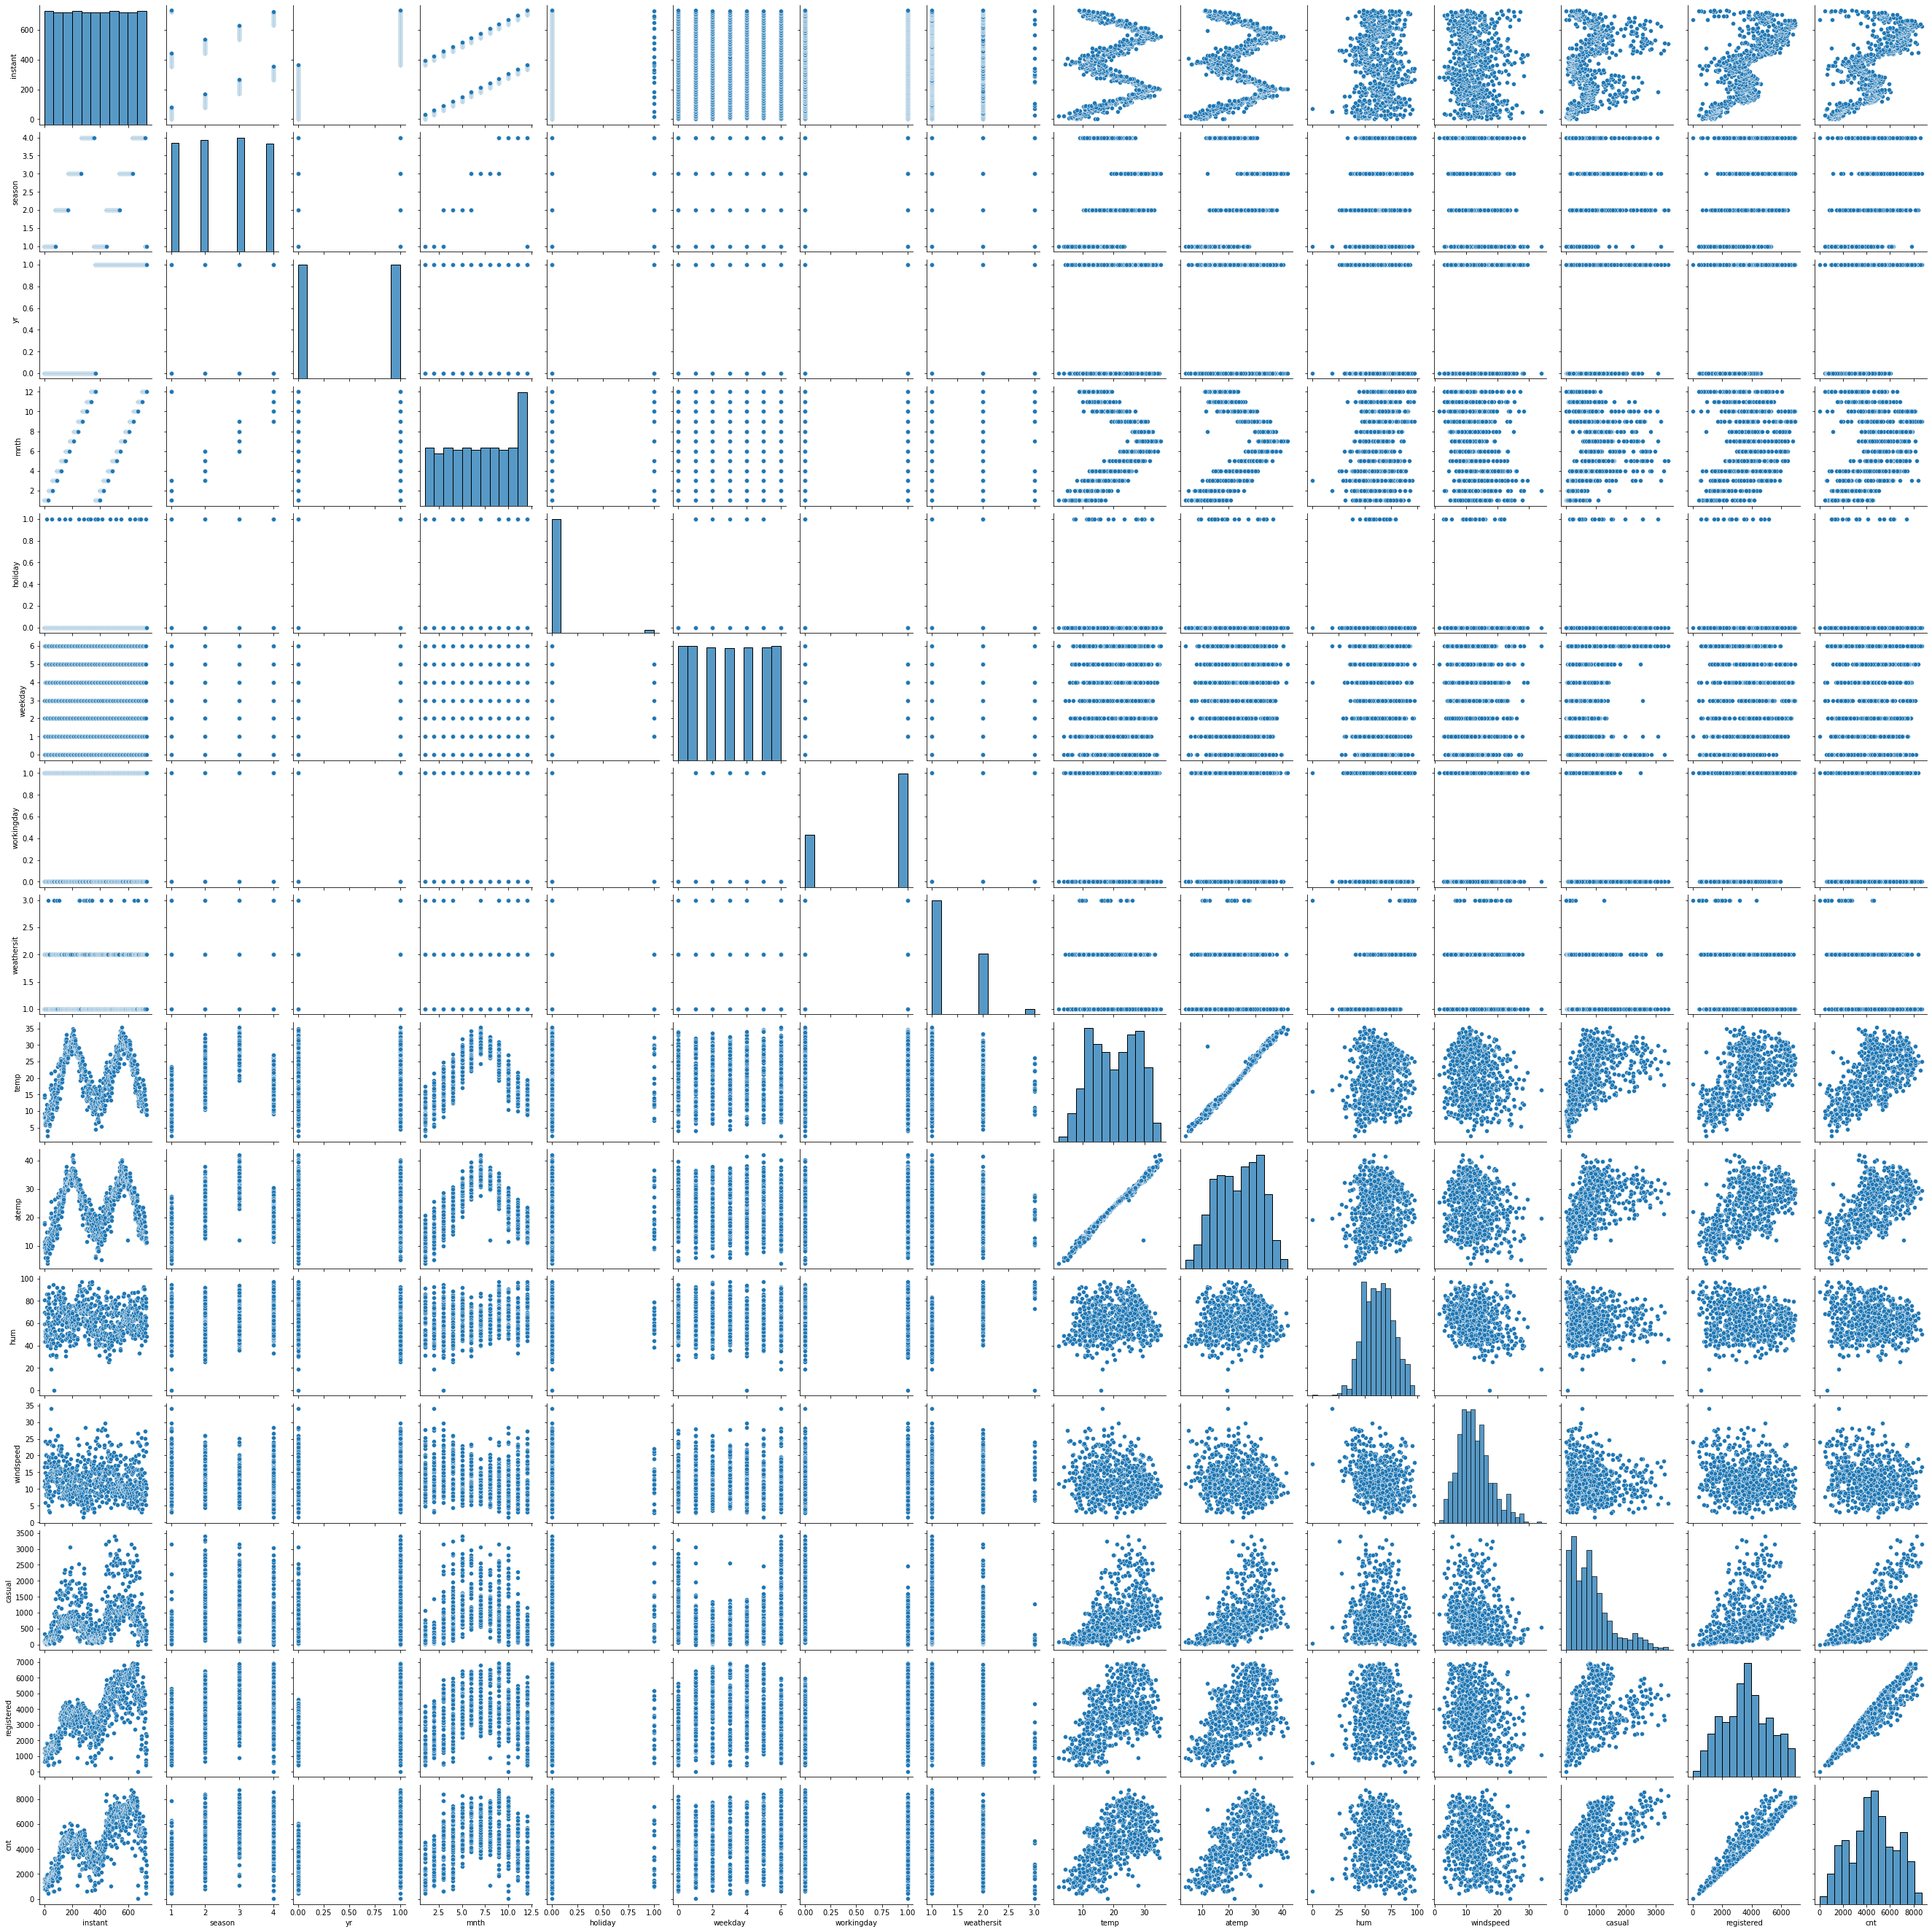

In [684]:
#Viulisation
sns.pairplot(bike)
plt.show()

#From the above variable we can consider liinear regression


In [685]:
#Removing the variable which are not required for the analysis

bike = bike.drop(['instant','dteday','casual','registered'],axis =1)

#converting some variable from numeric values to categorical values.

In [686]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


<AxesSubplot:xlabel='workingday', ylabel='cnt'>

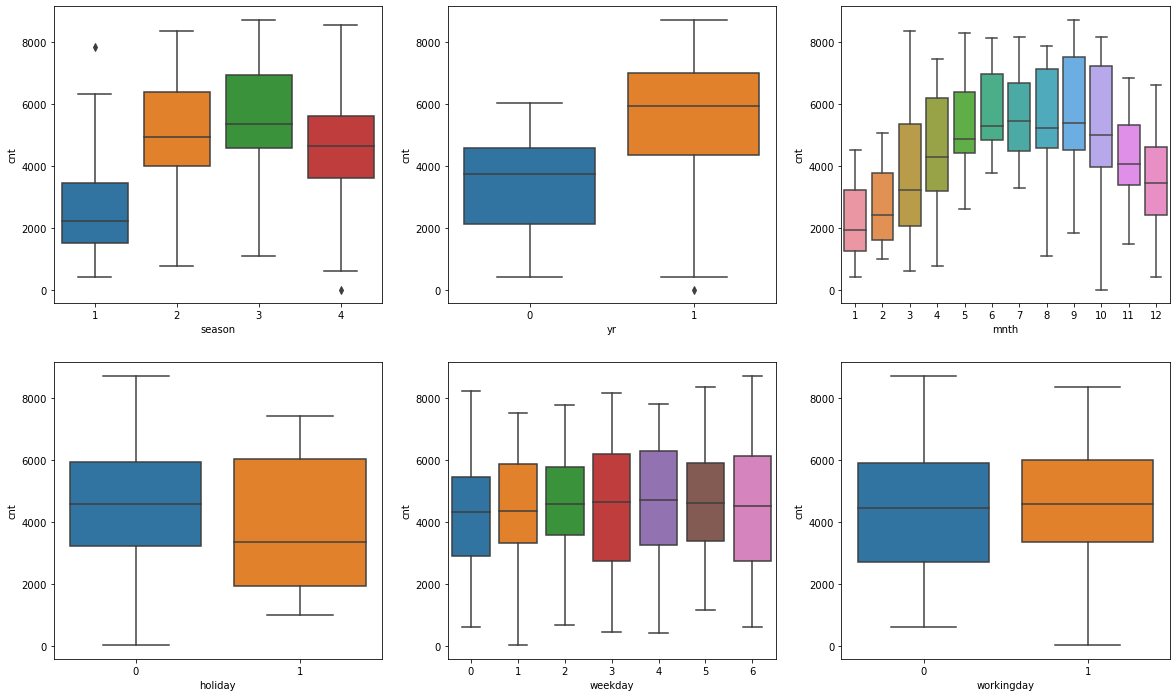

In [687]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt', data=bike)
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt', data=bike)
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt', data=bike)
plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt', data=bike)
plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt', data=bike)
plt.subplot(2,3,6)
sns.boxplot(x='workingday',y='cnt', data=bike)


# Data Preperation

In [688]:
#Convert numeric variables to categorical variables
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['yr']=bike['yr'].astype('category')
bike['mnth']=bike['mnth'].astype('category')

In [689]:
bike = pd.get_dummies(bike, drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       730 non-null    int64  
 1   weekday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  yr_1          730 non-null    uint8  
 12  mnth_2        730 non-null    uint8  
 13  mnth_3        730 non-null    uint8  
 14  mnth_4        730 non-null    uint8  
 15  mnth_5        730 non-null    uint8  
 16  mnth_6        730 non-null    uint8  
 17  mnth_7        730 non-null    uint8  
 18  mnth_8        730 non-null    

In [690]:
bike.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [691]:
bike.shape

(730, 25)

# Spliting into train and test

In [692]:
df_train,df_test = train_test_split(bike, train_size= 0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 25)
(220, 25)


The above is the 70%(510) of the bike sharing data which is used for the training


The above is the 30%(220) of the bike sharing data which is used for the testing

# Rescalling the feature
1. MIn max scalinging(normalisation)
; Between 0 and 1 2. Standardisation(mean-0, sigma-1)

In [693]:
#normaization(x-xmin)/(xmax-xmin)
#standardization(x-mu)/sigma

In [694]:
#1. Instantiate an object

scaler = MinMaxScaler()

#create a list of numeric variables
num_vars = ['temp','atemp','hum','windspeed',
           'cnt']
#Fit on data
df_train[num_vars] =scaler.fit_transform(df_train[num_vars])
df_train.head()


,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
576,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,1,0,0,0,0,0,0,0
426,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,1,0,0
482,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,5,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [695]:
df_train.describe()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,2.990196,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.345098,0.029412
std,0.157763,2.017093,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training the data

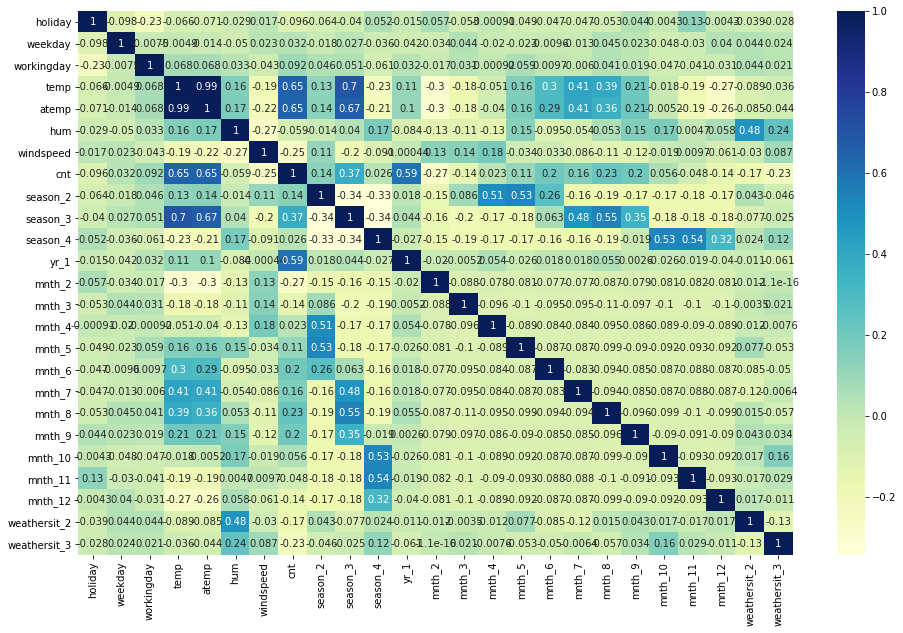

In [696]:
#heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [697]:
#x-train,y-train

y_train = df_train.pop('cnt')
X_train = df_train


# Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

RFE
Recursive feature elimination

In [698]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [699]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('weekday', False, 10),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 5),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 6),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 7),
 ('mnth_12', False, 8),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [700]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'yr_1', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [701]:
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6',
       'mnth_7', 'mnth_11', 'mnth_12'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics¶

In [702]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          1.00e-188
Time:                        13:36:50   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.027      8.665   

In [703]:
#Statistical significant of variables
#VIF

#add a constant 

X_train_sm = sm.add_constant(X_train['mnth_5'])

#create first model

lr = sm.OLS(y_train,X_train_sm)

#fit

lr_model = lr.fit()

#params
lr_model.params

const     0.505793
mnth_5    0.091401
dtype: float64

In [704]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.603
Date:                Sun, 11 Jul 2021   Prob (F-statistic):             0.0105
Time:                        13:36:50   Log-Likelihood:                 42.193
No. Observations:                 510   AIC:                            -80.39
Df Residuals:                     508   BIC:                            -71.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5058      0.010     48.972      0.000       0.486       0.526
mnth_5         0.0914      0.036      2.570      0.010       0.022       0.161
==============================================================================
Omnibus:                       47.585   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.971
Skew:                          -0.002   Prob(JB):                     0.000561
Kurtosis:                       2.161   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Instead of checking one by one let  us check all the variables and then remove variable which has not significant that the P value and also check for VIF if that is greater or equals to 0.5.

In [705]:
#add all the variables
bike.columns

Index(['holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [706]:
#build a module with all the variable

X_train_sm = sm.add_constant(X_train)


lr = sm.OLS(y_train,X_train_sm)

#fit

lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.5
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          4.27e-184
Time:                        13:36:51   Log-Likelihood:                 526.44
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1793      0.030      5.953      0.000       0.120       0.238
holiday         -0.0655      0.026     -2.494      0.013      -0.117      -0.014
weekday          0.0078      0.002      3.912      0.000       0.004       0.012
workingday       0.0172      0.009      1.978      0.048       0.000       0.034
temp             0.3816      0.141      2.703      0.007       0.104       0.659
atemp            0.0644      0.137      0.469      0.639      -0.205       0.334
hum             -0.1511      0.038     -3.925      0.000      -0.227      -0.075
windspeed       -0.1830      0.026     -6.966      0.000      -0.235      -0.131
season_2         0.0880      0.024      3.738      0.000       0.042       0.134
season_3         0.0447      0.030      1.494      0.136      -0.014       0.103
season_4         0.1532      0.026      5.923      0.000       0.102       0.204
yr_1             0.2328      0.008     28.937      0.000       0.217       0.249
mnth_2           0.0304      0.021      1.481      0.139      -0.010       0.071
mnth_3           0.0645      0.022      2.891      0.004       0.021       0.108
mnth_4           0.0631      0.034      1.884      0.060      -0.003       0.129
mnth_5           0.0886      0.036      2.455      0.014       0.018       0.160
mnth_6           0.0702      0.039      1.811      0.071      -0.006       0.146
mnth_7           0.0314      0.044      0.718      0.473      -0.055       0.117
mnth_8           0.0866      0.042      2.075      0.039       0.005       0.169
mnth_9           0.1505      0.037      4.037      0.000       0.077       0.224
mnth_10          0.0702      0.034      2.042      0.042       0.003       0.138
mnth_11          0.0221      0.033      0.675      0.500      -0.042       0.086
mnth_12          0.0179      0.026      0.679      0.498      -0.034       0.070
weathersit_2    -0.0594      0.010     -5.719      0.000      -0.080      -0.039
weathersit_3    -0.2535      0.026     -9.650      0.000      -0.305      -0.202
==============================================================================
Omnibus:                       84.303   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.919
Skew:                          -0.803   Prob(JB):                     1.60e-51
Kurtosis:                       5.903   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R square show a high co-related value of 85% which is a good for linear regression model

We also see few p value are above 0.5 which looks to be more or not significant but we also need to check with respective VIF as well.

In [707]:
#significance of variable basically P-values
#Drop the variable based on significan which are above 0.05

#### VIF

1/(1-R2)

In [708]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by= "VIF",ascending =False)
vif

,Features,VIF
3,temp,441.96
4,atemp,378.83
5,hum,20.31
8,season_3,15.34
17,mnth_8,10.90
9,season_4,10.79
16,mnth_7,9.52
7,season_2,8.93
15,mnth_6,7.42
18,mnth_9,7.28


#### 

High p-value high VIF

High/Low 

    High p-value ,low VIF == remove this first 

    low p-value, high VIF ==? remove this second

low p-value, low VIF

In [709]:
X = X_train.drop('atemp', axis=1)

X_train_sm = sm.add_constant(X)


lr = sm.OLS(y_train,X_train_sm)

#fit

lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          4.27e-185
Time:                        13:36:51   Log-Likelihood:                 526.32
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1799      0.030      5.985      0.000       0.121       0.239
holiday         -0.0663      0.026     -2.527      0.012      -0.118      -0.015
weekday          0.0077      0.002      3.897      0.000       0.004       0.012
workingday       0.0172      0.009      1.975      0.049    9.21e-05       0.034
temp             0.4442      0.046      9.643      0.000       0.354       0.535
hum             -0.1505      0.038     -3.915      0.000      -0.226      -0.075
windspeed       -0.1856      0.026     -7.234      0.000      -0.236      -0.135
season_2         0.0882      0.024      3.748      0.000       0.042       0.134
season_3         0.0441      0.030      1.478      0.140      -0.015       0.103
season_4         0.1533      0.026      5.930      0.000       0.102       0.204
yr_1             0.2327      0.008     28.959      0.000       0.217       0.248
mnth_2           0.0305      0.021      1.487      0.138      -0.010       0.071
mnth_3           0.0645      0.022      2.892      0.004       0.021       0.108
mnth_4           0.0634      0.033      1.893      0.059      -0.002       0.129
mnth_5           0.0879      0.036      2.439      0.015       0.017       0.159
mnth_6           0.0689      0.039      1.783      0.075      -0.007       0.145
mnth_7           0.0303      0.044      0.695      0.488      -0.055       0.116
mnth_8           0.0848      0.042      2.042      0.042       0.003       0.166
mnth_9           0.1499      0.037      4.026      0.000       0.077       0.223
mnth_10          0.0703      0.034      2.044      0.041       0.003       0.138
mnth_11          0.0223      0.033      0.682      0.496      -0.042       0.087
mnth_12          0.0182      0.026      0.689      0.491      -0.034       0.070
weathersit_2    -0.0595      0.010     -5.730      0.000      -0.080      -0.039
weathersit_3    -0.2544      0.026     -9.716      0.000      -0.306      -0.203
==============================================================================
Omnibus:                       83.370   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.417
Skew:                          -0.796   Prob(JB):                     9.24e-51
Kurtosis:                       5.882   Cond. No.                         99.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [710]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by= "VIF",ascending =False)
vif

,Features,VIF
3,temp,46.76
4,hum,20.13
7,season_3,15.31
16,mnth_8,10.81
8,season_4,10.79
15,mnth_7,9.49
6,season_2,8.93
14,mnth_6,7.39
17,mnth_9,7.27
13,mnth_5,7.14


In [711]:
X = X.drop('hum', axis=1)

X_train_sm = sm.add_constant(X)


lr = sm.OLS(y_train,X_train_sm)

#fit

lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.0
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          6.79e-183
Time:                        13:36:51   Log-Likelihood:                 518.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     487   BIC:                            -893.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0941      0.021      4.507      0.000       0.053       0.135
holiday         -0.0639      0.027     -2.403      0.017      -0.116      -0.012
weekday          0.0086      0.002      4.284      0.000       0.005       0.012
workingday       0.0180      0.009      2.048      0.041       0.001       0.035
temp             0.3948      0.045      8.783      0.000       0.306       0.483
windspeed       -0.1586      0.025     -6.324      0.000      -0.208      -0.109
season_2         0.0837      0.024      3.512      0.000       0.037       0.131
season_3         0.0486      0.030      1.606      0.109      -0.011       0.108
season_4         0.1537      0.026      5.862      0.000       0.102       0.205
yr_1             0.2364      0.008     29.216      0.000       0.221       0.252
mnth_2           0.0363      0.021      1.747      0.081      -0.005       0.077
mnth_3           0.0755      0.022      3.365      0.001       0.031       0.120
mnth_4           0.0821      0.034      2.441      0.015       0.016       0.148
mnth_5           0.0999      0.036      2.741      0.006       0.028       0.171
mnth_6           0.0951      0.039      2.463      0.014       0.019       0.171
mnth_7           0.0528      0.044      1.202      0.230      -0.033       0.139
mnth_8           0.1003      0.042      2.392      0.017       0.018       0.183
mnth_9           0.1569      0.038      4.158      0.000       0.083       0.231
mnth_10          0.0720      0.035      2.065      0.039       0.004       0.141
mnth_11          0.0245      0.033      0.738      0.461      -0.041       0.090
mnth_12          0.0150      0.027      0.562      0.575      -0.038       0.068
weathersit_2    -0.0828      0.009     -9.604      0.000      -0.100      -0.066
weathersit_3    -0.2954      0.024    -12.136      0.000      -0.343      -0.248
==============================================================================
Omnibus:                       86.050   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.025
Skew:                          -0.815   Prob(JB):                     2.79e-53
Kurtosis:                       5.955   Cond. No.                         97.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [712]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by= "VIF",ascending =False)
vif

,Features,VIF
3,temp,35.13
6,season_3,15.27
7,season_4,10.79
15,mnth_8,10.71
14,mnth_7,9.35
5,season_2,8.92
16,mnth_9,7.27
13,mnth_6,7.23
12,mnth_5,7.11
17,mnth_10,6.48


In [713]:
X = X.drop('season_3', axis=1)

X_train_sm = sm.add_constant(X)


lr = sm.OLS(y_train,X_train_sm)

#fit

lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          2.12e-183
Time:                        13:36:51   Log-Likelihood:                 517.06
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     488   BIC:                            -897.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0930      0.021      4.448      0.000       0.052       0.134
holiday         -0.0639      0.027     -2.401      0.017      -0.116      -0.012
weekday          0.0085      0.002      4.252      0.000       0.005       0.012
workingday       0.0187      0.009      2.126      0.034       0.001       0.036
temp             0.4036      0.045      9.032      0.000       0.316       0.491
windspeed       -0.1615      0.025     -6.446      0.000      -0.211      -0.112
season_2         0.0627      0.020      3.142      0.002       0.024       0.102
season_4         0.1323      0.023      5.852      0.000       0.088       0.177
yr_1             0.2361      0.008     29.140      0.000       0.220       0.252
mnth_2           0.0358      0.021      1.721      0.086      -0.005       0.077
mnth_3           0.0814      0.022      3.670      0.000       0.038       0.125
mnth_4           0.1008      0.032      3.193      0.001       0.039       0.163
mnth_5           0.1168      0.035      3.345      0.001       0.048       0.185
mnth_6           0.1210      0.035      3.444      0.001       0.052       0.190
mnth_7           0.0955      0.035      2.728      0.007       0.027       0.164
mnth_8           0.1435      0.032      4.454      0.000       0.080       0.207
mnth_9           0.1949      0.029      6.628      0.000       0.137       0.253
mnth_10          0.0905      0.033      2.743      0.006       0.026       0.155
mnth_11          0.0443      0.031      1.435      0.152      -0.016       0.105
mnth_12          0.0288      0.025      1.133      0.258      -0.021       0.079
weathersit_2    -0.0827      0.009     -9.574      0.000      -0.100      -0.066
weathersit_3    -0.2934      0.024    -12.048      0.000      -0.341      -0.246
==============================================================================
Omnibus:                       83.070   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.374
Skew:                          -0.795   Prob(JB):                     2.57e-50
Kurtosis:                       5.867   Cond. No.                         84.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [714]:
   vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by= "VIF",ascending =False)
vif 

,Features,VIF
3,temp,34.63
6,season_4,7.98
11,mnth_5,6.51
14,mnth_8,6.27
5,season_2,6.23
12,mnth_6,5.95
13,mnth_7,5.89
16,mnth_10,5.78
17,mnth_11,5.10
10,mnth_4,4.94


In [715]:
X = X.drop(["mnth_11","mnth_12"], axis=1)

X_train_sm = sm.add_constant(X)


lr = sm.OLS(y_train,X_train_sm)

#fit

lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     141.7
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          4.17e-185
Time:                        13:36:51   Log-Likelihood:                 515.98
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     490   BIC:                            -907.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0976      0.020      4.811      0.000       0.058       0.137
holiday         -0.0613      0.027     -2.312      0.021      -0.113      -0.009
weekday          0.0085      0.002      4.257      0.000       0.005       0.012
workingday       0.0186      0.009      2.109      0.035       0.001       0.036
temp             0.4211      0.043      9.793      0.000       0.337       0.506
windspeed       -0.1584      0.025     -6.354      0.000      -0.207      -0.109
season_2         0.0635      0.020      3.181      0.002       0.024       0.103
season_4         0.1565      0.015     10.427      0.000       0.127       0.186
yr_1             0.2353      0.008     29.119      0.000       0.219       0.251
mnth_2           0.0254      0.019      1.324      0.186      -0.012       0.063
mnth_3           0.0687      0.020      3.436      0.001       0.029       0.108
mnth_4           0.0861      0.030      2.905      0.004       0.028       0.144
mnth_5           0.0999      0.033      3.060      0.002       0.036       0.164
mnth_6           0.1021      0.032      3.159      0.002       0.039       0.166
mnth_7           0.0756      0.032      2.372      0.018       0.013       0.138
mnth_8           0.1248      0.029      4.277      0.000       0.067       0.182
mnth_9           0.1726      0.025      7.015      0.000       0.124       0.221
mnth_10          0.0520      0.019      2.795      0.005       0.015       0.088
weathersit_2    -0.0830      0.009     -9.619      0.000      -0.100      -0.066
weathersit_3    -0.2921      0.024    -12.003      0.000      -0.340      -0.244
==============================================================================
Omnibus:                       79.191   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.725
Skew:                          -0.768   Prob(JB):                     1.06e-46
Kurtosis:                       5.758   Cond. No.                         72.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [716]:
   vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by= "VIF",ascending =False)
vif 

,Features,VIF
3,temp,29.05
5,season_2,6.22
11,mnth_5,5.63
14,mnth_8,4.99
12,mnth_6,4.94
13,mnth_7,4.74
10,mnth_4,4.36
4,windspeed,4.21
6,season_4,3.28
2,workingday,3.07


In [717]:
X = X.drop(["season_2","mnth_5","mnth_6"], axis=1)

X_train_sm = sm.add_constant(X)


lr = sm.OLS(y_train,X_train_sm)

#fit

lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     148.6
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          7.74e-177
Time:                        13:36:52   Log-Likelihood:                 488.21
No. Observations:                 510   AIC:                            -942.4
Df Residuals:                     493   BIC:                            -870.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0853      0.021      4.050      0.000       0.044       0.127
holiday         -0.0822      0.028     -2.973      0.003      -0.137      -0.028
weekday          0.0081      0.002      3.852      0.000       0.004       0.012
workingday       0.0180      0.009      1.938      0.053      -0.000       0.036
temp             0.6199      0.027     22.710      0.000       0.566       0.674
windspeed       -0.1606      0.026     -6.122      0.000      -0.212      -0.109
season_4         0.1039      0.013      7.855      0.000       0.078       0.130
yr_1             0.2306      0.008     27.217      0.000       0.214       0.247
mnth_2          -0.0155      0.019     -0.811      0.418      -0.053       0.022
mnth_3           0.0245      0.016      1.544      0.123      -0.007       0.056
mnth_4           0.0668      0.017      3.897      0.000       0.033       0.100
mnth_7          -0.0797      0.020     -4.072      0.000      -0.118      -0.041
mnth_8          -0.0200      0.018     -1.136      0.256      -0.054       0.015
mnth_9           0.0614      0.017      3.543      0.000       0.027       0.095
mnth_10          0.0151      0.018      0.820      0.413      -0.021       0.051
weathersit_2    -0.0775      0.009     -8.596      0.000      -0.095      -0.060
weathersit_3    -0.2892      0.026    -11.292      0.000      -0.339      -0.239
==============================================================================
Omnibus:                       44.185   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.315
Skew:                          -0.560   Prob(JB):                     1.63e-17
Kurtosis:                       4.544   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [718]:
   vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by= "VIF",ascending =False)
vif 

,Features,VIF
3,temp,7.91
4,windspeed,4.18
2,workingday,3.04
1,weekday,2.94
5,season_4,2.06
6,yr_1,2.05
11,mnth_8,1.67
10,mnth_7,1.65
13,mnth_10,1.61
14,weathersit_2,1.53


In [730]:
'''
X = X.drop('temp', axis=1)

X_train_sm = sm.add_constant(X)


lr = sm.OLS(y_train,X_train_sm)

#fit

lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

'''

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     60.81
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          7.86e-102
Time:                        13:43:07   Log-Likelihood:                 305.65
No. Observations:                 510   AIC:                            -579.3
Df Residuals:                     494   BIC:                            -511.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4072      0.022     18.287      0.000       0.363       0.451
holiday         -0.0931      0.040     -2.357      0.019      -0.171      -0.015
weekday          0.0068      0.003      2.258      0.024       0.001       0.013
workingday       0.0298      0.013      2.258      0.024       0.004       0.056
windspeed       -0.1982      0.037     -5.296      0.000      -0.272      -0.125
season_4         0.0240      0.018      1.318      0.188      -0.012       0.060
yr_1             0.2498      0.012     20.740      0.000       0.226       0.273
mnth_2          -0.1499      0.026     -5.773      0.000      -0.201      -0.099
mnth_3          -0.0326      0.022     -1.456      0.146      -0.076       0.011
mnth_4           0.0608      0.024      2.483      0.013       0.013       0.109
mnth_7           0.1317      0.025      5.354      0.000       0.083       0.180
mnth_8           0.1585      0.022      7.058      0.000       0.114       0.203
mnth_9           0.1927      0.023      8.258      0.000       0.147       0.239
mnth_10          0.1061      0.026      4.124      0.000       0.056       0.157
weathersit_2    -0.0966      0.013     -7.527      0.000      -0.122      -0.071
weathersit_3    -0.3049      0.037     -8.337      0.000      -0.377      -0.233
==============================================================================
Omnibus:                       16.863   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.881
Skew:                          -0.380   Prob(JB):                     7.94e-05
Kurtosis:                       3.558   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If we remove the temp the R squared and the F-static are going low. As we know the high the F-statistics the model is more significant.

In [719]:
X.columns

Index(['holiday', 'weekday', 'workingday', 'temp', 'windspeed', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# Residual Analysis

In [720]:
y_train_pred = lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

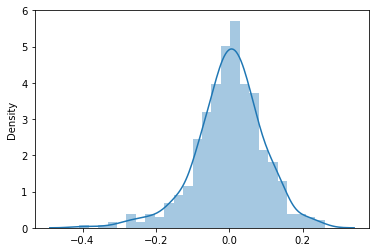

In [721]:
res = y_train - y_train_pred
sns.distplot(res)

# Prediction and evaluation on test sets

In [722]:
#create a list of numeric variables
num_vars = ['temp','atemp','hum','windspeed',
           'cnt']
#Fit on data
df_test[num_vars] =scaler.transform(df_test[num_vars])
df_test.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
184,1,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,0,3,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,1,0,0,0,0,0,0,0,0
299,0,4,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,3,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,1,0,0,0,0,0,0
152,0,4,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,1,0,0,0,0,0,0,0,0


In [723]:
df_test.describe()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,3.013636,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.318182,0.027273
std,0.187620,1.985057,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [724]:
y_test = df_test.pop('cnt')
X_test =df_test

In [725]:
X_test_sm = X_test[X.columns]
#add a constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,holiday,weekday,workingday,temp,windspeed,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_7,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
184,1.0,1,1,0,0.831783,0.084219,0,0,0,0,0,1,0,0,0,1,0
535,1.0,0,3,1,0.901354,0.153728,0,1,0,0,0,0,0,0,0,0,0
299,1.0,0,4,1,0.511964,0.334206,1,0,0,0,0,0,0,0,1,1,0
221,1.0,0,3,1,0.881625,0.339570,0,0,0,0,0,0,1,0,0,0,0
152,1.0,0,4,1,0.817246,0.537414,0,0,0,0,0,0,0,0,0,0,0


In [726]:
#predict
y_test_pred = lr_model.predict(X_test_sm)

In [727]:
#evaluate
r2_score(y_true=y_test, y_pred = y_test_pred)

0.7960965089493314

From the train data the R-squared:	0.828


From the test data the R-squared:	0.796

# Model Evaluation

Text(0, 0.5, 'y_test_pred')

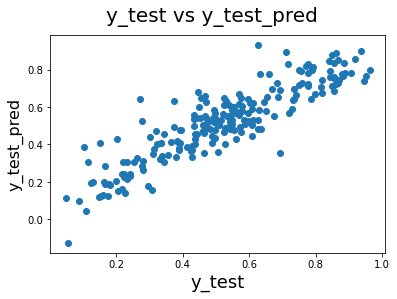

In [728]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label